# this file fasttrack introduction about machine learning all topics
+ source online
+ Dated on: don't know

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline 

cancer = load_breast_cancer()

In [3]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
print(cancer['feature_names'])
print(cancer['target_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [7]:
cancer.data.shape

(569, 30)

# Process Outline
+ 1.Get the data(process it)
+ 2.Choose the algorithm 
+ 3 train algoritham & verity the accuracy, optimise
+ 4. Predict

In [2]:
import pandas as pd
raw_data = pd.read_csv('c:/Users/Hari/Desktop/datasets/cancer.csv')

In [3]:
raw_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer_state
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
# HEre we will use the mglearn library for visualization purpose
# !pip install mglearn # mglearn library installation
import mglearn


E:\installation_files\anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


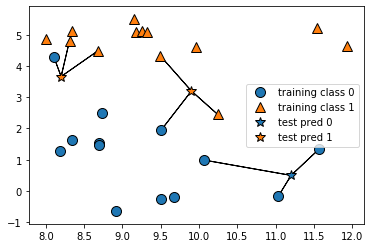

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

%matplotlib inline
cancer  = load_breast_cancer()

# X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'],test_size = 0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [46]:
print('Accuracy of Knn n=5 on training set : {:,.3f}'.format(knn.score(X_train,y_train)))
print('ACcuracy of KNN n=5 on testing data : {:,.4f}'.format(knn.score(X_test,y_test)))

Accuracy of Knn n=5 on training set : 0.946
ACcuracy of KNN n=5 on testing data : 0.9301


# Improving the model accuracy with help of tunning paramerter 
+ 1. Number of nearest neighbors
+ 2. 

E:\installation_files\anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


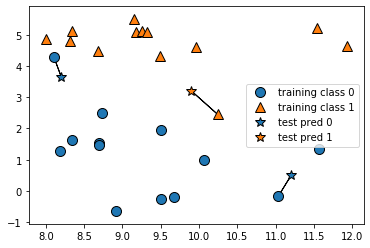

In [10]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11) # it should be range not a list of values 
for neighbor in neighbors_setting: # Here in for loop requrired number filled to iterate values 
    clf = KNeighborsClassifier(n_neighbors=neighbor)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

mglearn.plots.plot_knn_classification()
# fig,ax = plt.figure()    


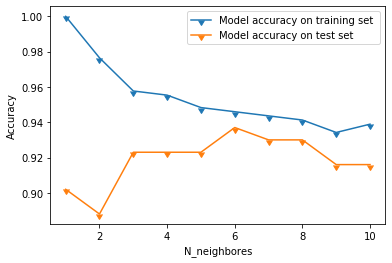

In [11]:
plt.plot(neighbors_setting,training_accuracy,label='Model accuracy on training set ',marker = 11)
plt.plot(neighbors_setting,test_accuracy,label = 'Model accuracy on test set ',marker = 11)
# ax.vline() .Here the idea is the i need to put marker or the stright line which indicating the maximum value over graph 
plt.ylabel('Accuracy')
plt.xlabel('N_neighbores')
plt.legend()


<h1> Supervised Learning</h1>

# 1. Classification(categorical data)
+ binary classification(yes,no)
+ multiclass regression(number classification)
+ Examples : KNN,Linearmodel,SVM,Decision Trees,Logistic reg


# 2. Regression(continuous data)
+ prediction stock price,age
+ examples : KNN,Linear,Logistic,SVM,Decision Trees

# cancer datase problem solving with Logistic regression 


In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
# from IPython.display import display()
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 42)

log_reg = LogisticRegression(solver='liblinear') # it binary classifier 
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print('Accuracy of logit on training set :{:,.2f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy of logit on test set : {:,.2f}'.format(log_reg.score(X_test,y_test)))

Accuracy of logit on training set :0.96
Accuracy of logit on test set : 0.96


# Regularization:
+ 1. preveting overfitting 
+ 2. L1 assumes only few features are important
+ 3. L2 Does't assume only few features are important, perform as per default Scikit learn in LogisticRegression

'C':
+ 1. parameter to control the strenght of regularization
+ 2. lower C => will adjust majority of data points
+ 3. higher C => correct classification of each datapoints

## if scores of both trainig data and test are close to each other. It may cause problem of under fitting 

In [14]:
log_reg100 = LogisticRegression(C=100,solver='liblinear',random_state=99) # with random_state
log_reg100.fit(X_train,y_train)
print('Accuracy of logit on training set :{:,.3f}'.format(log_reg100.score(X_train,y_train)))
print('Accuracy of logit on test set : {:,.3f}'.format(log_reg100.score(X_test,y_test)))

Accuracy of logit on training set :0.972
Accuracy of logit on test set : 0.965


In [15]:
log_reg100 = LogisticRegression(C=1000,solver='liblinear') # without random_state
log_reg100.fit(X_train,y_train)
print('Accuracy of logit on training set :{:,.3f}'.format(log_reg100.score(X_train,y_train)))
print('Accuracy of logit on test set : {:,.3f}'.format(log_reg100.score(X_test,y_test)))

Accuracy of logit on training set :0.984
Accuracy of logit on test set : 0.979


In [16]:
log_reg001 = LogisticRegression(C=0.01,solver='liblinear',random_state=1)
log_reg001.fit(X_train,y_train)
print('Accuracy of logit on training set :{:,.3f}'.format(log_reg001.score(X_train,y_train)))
print('Accuracy of logit on test set : {:,.3f}'.format(log_reg001.score(X_test,y_test)))

Accuracy of logit on training set :0.934
Accuracy of logit on test set : 0.930


In [17]:
log_reg001 = LogisticRegression(C=0.01,solver='liblinear') # without random_state
log_reg001.fit(X_train,y_train)
print('Accuracy of logit on training set :{:,.3f}'.format(log_reg001.score(X_train,y_train)))
print('Accuracy of logit on test set : {:,.3f}'.format(log_reg001.score(X_test,y_test)))

Accuracy of logit on training set :0.934
Accuracy of logit on test set : 0.930


In [18]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state = 66)

training_accuracy = []
test_accuracy = []
neigh = []
neighbors_setting = range(100,1000) # it should be range not a list of values 
for neighbor in neighbors_setting:
    log_reg = LogisticRegression(C=neighbor,solver='liblinear')
    log_reg.fit(X_train,y_train)
    training_accuracy.append(log_reg.score(X_train,y_train))
    training_accuracy.append(neighbor)
    test_accuracy.append(log_reg.score(X_test,y_test))
    test_accuracy.append(neighbor)
   
    neigh.append(neighbor)

# mglearn.plots.plot_knn_classification()
# fig,ax = plt.figure()    
# training_accuracy.append(log_reg.score(X_train,y_train))
# test_accuracy.append(log_reg.score(X_test,y_test))
# a_tri = pd.DataFrame(training_accuracy,test_accuracy,columns=['training','test'])


In [21]:
training_accuracy.append(log_reg.score(X_train,y_train))
test_accuracy.append(log_reg.score(X_test,y_test))
acc = pd.DataFrame({'training_accuracy' : training_accuracy,'test_accuracy':test_accuracy})
display(acc.max())
print(acc.min())
h = pd.Series(training_accuracy)

training_accuracy    999.0
test_accuracy        999.0
dtype: float64

training_accuracy    0.974178
test_accuracy        0.944056
dtype: float64


ValueError: x and y must have same first dimension, but have shapes (900,) and (1802,)

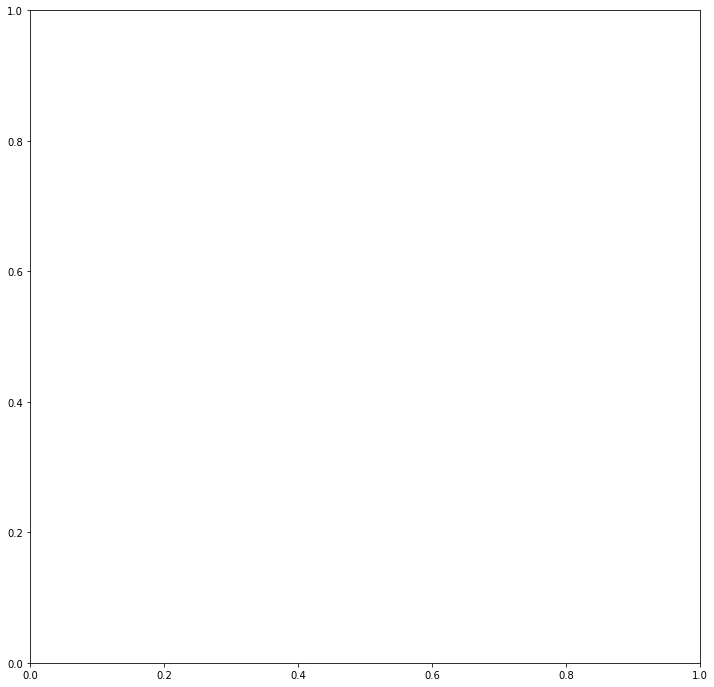

In [22]:
plt.figure(figsize=(12,12))
plt.plot(neighbors_setting,training_accuracy,label='Model accuracy on training set ')
plt.plot(neighbors_setting,test_accuracy,label = 'Model accuracy on test set ')
# ax.vline() .Here the idea is the i need to put marker or the stright line which indicating the maximum value over graph 
plt.ylabel('Accuracy')
plt.xlim()
plt.xlabel('N_neighbores')
plt.legend(loc='lower right')


# Implementing the GridsearchCV solution for above problem: (Hyperparamer tunning) 

In [28]:
from sklearn.model_selection import GridSearchCV

grid_param = [{ 'C':[100,200,500,600,700,1000],'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]
log_reg1 = LogisticRegression()

gcv = GridSearchCV(log_reg1,grid_param,cv=5)
gcv.fit(X_train,y_train)

E:\installation_files\anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\installation_files\anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\installation_files\anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\installation_files\anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
E:\installation_files\anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [100, 200, 500, 600, 700, 1000],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# print(gcv.cv_results_)

print('grid_searchcv: best parameter',gcv.best_params_)
print('score',gcv.score)

grid_searchcv: best parameter {'C': 100, 'solver': 'liblinear'}
score <bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [100, 200, 500, 600, 700, 1000],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=Tr

### Linear Models (in general): 

#### <center> y = w * x + b </center>

- w - slope (or coefficient) - accessed via <raw>.coef_</raw>
- b - offset (or intercept) - access via <raw>.intercept_</raw>
- w and b are learned parameters
- y - prediction (decision)

Example (for a dataset with only 1 input features): ŷ = w[0] * x[0] + b 

### For Logistic Regression (specifically):

#### <center> ŷ = w[0] \* x[0] + w[1] \* x[1] + ... + w[p] \* x[p] + b > 0</center>

w[0]: 0.393906  b: -0.031804


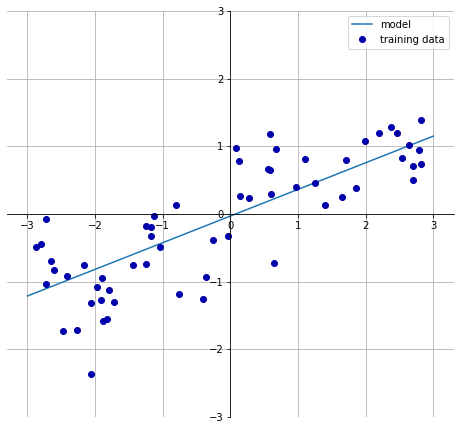

In [30]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

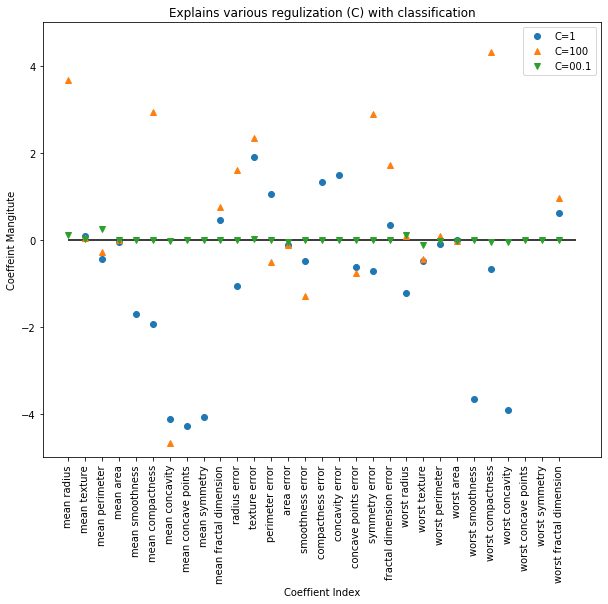

In [50]:
plt.figure(figsize=(10,8))
plt.plot(log_reg.coef_.T,'o',label='C=1') # 'o'--> represent the circles 
plt.plot(log_reg100.coef_.T,'^',label='C=100') # '^' --> represent the triangel
plt.plot(log_reg001.coef_.T,'v',label='C=00.1')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90) # cancer.data.shape[0]--represent the number of rows                                                                # cancer.data.shape[1] --> represnt the list of columns in shpae  
plt.hlines(0,0,cancer.data.shape[1]) # draw a line along with all cancer dataset columns variables 
plt.ylim(-5,5)
plt.title('Explains various regulization (C) with classification')
plt.xlabel('Coeffient Index')
plt.ylabel('Coeffeint Mangitute')
plt.legend(loc='upper right')

# Working with decision trees 

### From the Titanic Dataset
![](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)
<div style='text-align:right;'>By Stephen Milborrow (Own work) [CC BY-SA 3.0 via Wikimedia Commons]</div>

# dated on 9/12/2019

Feature importances: [0. 1.]


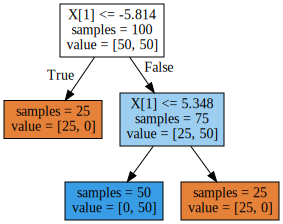

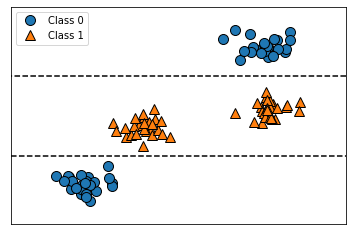

In [144]:
import mglearn
from matplotlib import pyplot as plt
%matplotlib inline

'''Here top node is root node, terminal node(leafs),branch nodes'''
'''Second figure is the decision boundaries of two datasets'''
mglearn.plots.plot_tree_not_monotone()


# importing the dataset and the necesarry libries 

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

print('Accuracy on trainig dataset {:,0.3f}',tree.score(X_train,y_train)) # it's notify us model is overfitting 
# Overfitting over with pruning(it's cutting away dead or overgrown branchs or stems, especially to encourage the growth) :
print('Accuracy on trainig dataset {:,0.3f}',tree.score(X_test,y_test))

Accuracy on trainig dataset {:,0.3f} 1.0
Accuracy on trainig dataset {:,0.3f} 0.9300699300699301


In [181]:
tree = DecisionTreeClassifier(max_depth=4,random_state=42)
tree.fit(X_train,y_train)

print('Accuracy on trainig dataset {:,0.3f}',tree.score(X_train,y_train)) # it's notify us model is overfitting 
# Overfitting over with pruning(it's cutting away dead or overgrown branchs or stems, especially to encourage the growth) :
print('Accuracy on trainig dataset {:,0.3f}',tree.score(X_test,y_test))
# it's look better 

Accuracy on trainig dataset {:,0.3f} 0.9882629107981221
Accuracy on trainig dataset {:,0.3f} 0.9440559440559441


# Viualizing the cancer dataset decision tree


In [173]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(
    tree,
    out_file='cancertree1.dot',class_names=['malignant','benign'],
    feature_names=cancer.feature_names,
    impurity=True,
    filled = True,
    rounded = True
)

![](cancertree1.png)

# from above tree we can analysis that is worst_radiou has more importacne same thing, we can verify in below stpes  

In [174]:
tree.feature_importances_

array([0.        , 0.01258462, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0141577 , 0.        , 0.        ,
       0.        , 0.04839825, 0.        , 0.01261296, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.03323127, 0.        , 0.        , 0.        ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [175]:
type(cancer.feature_names)
import numpy as np

# plot the feature import of cancer dataset 


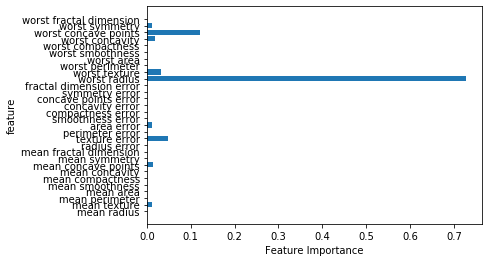

In [176]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_)         
plt.yticks(np.arange(n_features),cancer.feature_names)
# plt.yticks((np.arange(n_features),cancer.feature_names)           
plt.xlabel('Feature Importance')
plt.ylabel('feature')
plt.show()

# Feature tunning in Decision trees

### Advantages of Decision Trees

 - easy to view and understand
 - no need to pre-process, normalize, scale, and/or standardize features
 
### Paramaters to work with
 
 - max_depth
 - min_samples_leaf, max_samples_leaf
 - max_leaf_nodes
 - etc.
 
### Main Disadvantages

- tendency to overfit
- poor generalization 

####  <center> Possible work-around: ensembles of decision trees </center>

# Working with Ensembles tress
+ Randome forest is collection  group of decision tress, combine multiple tress 
+ Use randomness while building each building trees 
+ Main thing is we have to pass the n_estimators

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

cancer= load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target
                                                    ,random_state = 42)

forest = RandomForestClassifier(n_estimators=100,random_state=0)

forest.fit(X_train,y_train)
forest.

print('Accuracy on training datast: {:,.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test datast: {:,.3f}'.format(forest.score(X_test,y_test)))



Accuracy on training datast: 1.000
Accuracy on test datast: 0.958


In [183]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),forest.feature_importances_)         
plt.yticks(np.arange(n_features),cancer.feature_names)
# plt.yticks((np.arange(n_features),cancer.feature_names)           
plt.xlabel('Feature Importance')
plt.ylabel('feature')
plt.show()

# Here the  features importance of singel decision trees and random forest is different 
+ The senerio an perspective is quite different from each other 


### Potential Advantages of Random Forests

 - powerful and widely implemented
 - perform well with default settings
 - dont require scaling of the data
 - randomization makes them better than single DT
 
### Parameters to Tune
 
 - n_jobs - number of cores to use for training (n_jobs=-1, for all cores)
 - n_estimators - how many trees to use (more is always better)
 - max_depth, for pre-pruning
 - max_features, for randomization
     - max_features = sqrt(n_features), for classification
     - max_features = log2(n_features), for regression
 - etc.
 
### Potential Disadvantages of Random Forests

- not so good performance on very high dimensional and sparse data (text data)
- large datasets require more resources for training (time, CPUs, etc).
- cannot be visualized as well as single DT

# Scikit learn with neural network

## <center> Neural Networks in scikit-learn </center>

#### Linear models:

<center> ŷ = w[0] \* x[0] + w[1] \* x[1] + ... + w[p] \* x[p] + b </center>

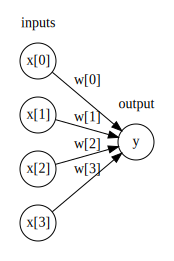

In [3]:
# viusalizing the linear neural netwrok
import mglearn
mglearn.plots.plot_logistic_regression_graph()

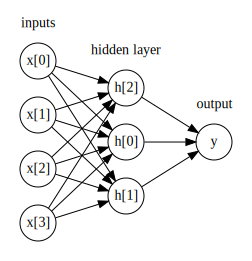

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

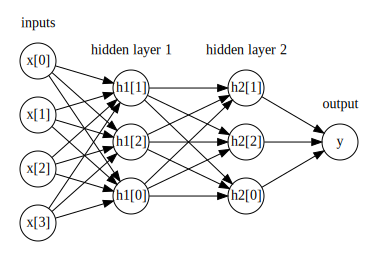

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

# training the neutral network with cancer dataset with multi layer perceptron 

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
mlp = MLPClassifier(random_state=42 )
mlp.fit(X_train,y_train)

print('Accuracy on training datast: {:,.3f}'.format(mlp.score(X_train,y_train)))
print('Accuracy on test datast: {:,.3f}'.format(mlp.score(X_test,y_test)))


Accuracy on training datast: 0.939
Accuracy on test datast: 0.923


# Neural network perfomance tunning : [By scaling technique]
+ BY appling the scaling technique on the features 
+ The features should be zero mean and unit variance then that dataset has scaled : that data follows **Normal distributions** 

In [2]:
print('The maximum for each features : \n{}'.format(cancer.data.max(axis=0)))

The maximum for each features : 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
std = StandardScaler()
X_train_scaled = std.fit(X_train).fit_transform(X_train)
X_test_scaled = std.fit(X_test).fit_transform(X_test)

mlp = MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)


print('Accuracy on training datast: {:,.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test datast: {:,.3f}'.format(mlp.score(X_test_scaled,y_test)))


Accuracy on training datast: 1.000
Accuracy on test datast: 0.958


# with max_iter should be notify other it con't converged 

In [4]:
mlp = MLPClassifier(max_iter=200,random_state=42)
mlp.fit(X_train_scaled,y_train)


print('Accuracy on training datast: {:,.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test datast: {:,.3f}'.format(mlp.score(X_test_scaled,y_test)))

Accuracy on training datast: 0.998
Accuracy on test datast: 0.958


E:\installation_files\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [5]:
mlp = MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(X_train_scaled,y_train)


print('Accuracy on training datast: {:,.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test datast: {:,.3f}'.format(mlp.score(X_test_scaled,y_test)))


Accuracy on training datast: 1.000
Accuracy on test datast: 0.958


# Date : 10/12/2019

# In the above case a high descripency is their between trining(1.00) and testing score(95.8) 
+ so we have strenght the regularization by using the **alpha and max iteration**

In [15]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=42)
mlp.fit(X_train_scaled,y_train)

print('Accuracy on training datast: {:,.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('Accuracy on test datast: {:,.3f}'.format(mlp.score(X_test_scaled,y_test)))
# But we did't achive desire value here let's investigate  

Accuracy on training datast: 0.988
Accuracy on test datast: 0.958


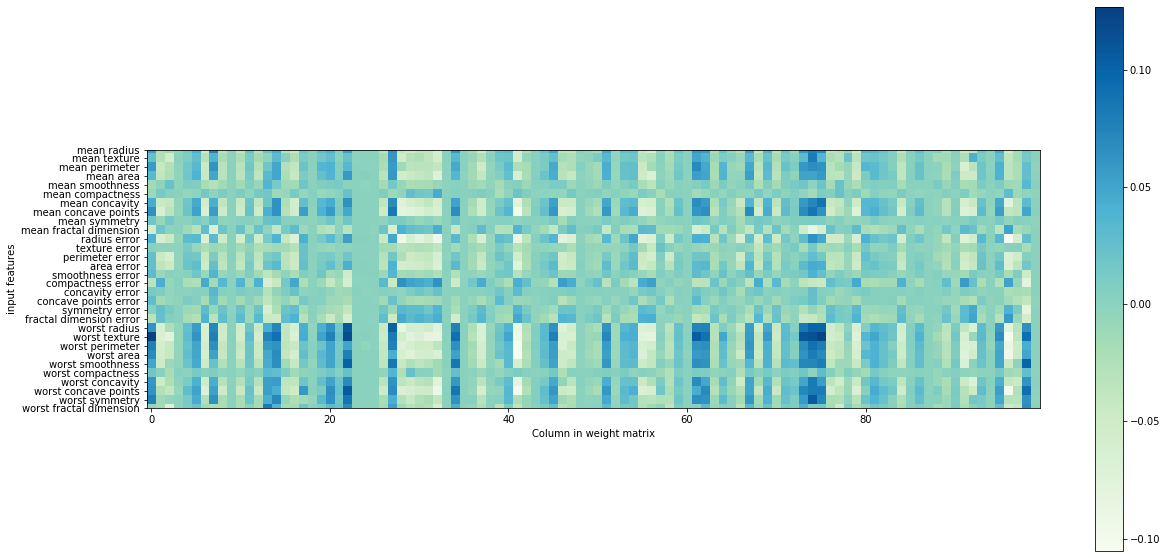

In [17]:
# now focus on visualization 
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))  # figure size (20 inches,5 inces(width))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap = 'GnBu')
plt.yticks(range(30),cancer.feature_names) # feature name on y axis 
plt.xlabel('Column in weight matrix')
plt.ylabel('input features')
plt.colorbar()



## <center> Advantages and Disadvantages of Neural Nets (scikit-learn) </center>







### Stronger points:
 - can be used efficiently on large datasets
 - can build very complex models
 - many parameters for tuning
 - flexibility and rapid prototyping
 - etc.
 
### Weaker points:
 - many parameters for tuning
 - some solvers are scale sensitive
 - data may need to be pre-processed
 - etc.
 
 
### Alternatives:
 
 - theano
 - tensorflow
 - keras
 - lasagna
 - etc. 

## <center> Support Vector Machines (SVMs) in scikit-learn </center>

- for classification and regression (SVCs, SVRs)
- can be applied on linear and non-linear data
- look for the best separating line or decision boundary
- look for the largest margin 

![](SVM.png)

![](SVM2.png)

![](SVM3.png)

### Commonly used kernels:

- linear
- polynomial
- radial basis function (RBF) - Gaussian RBF
- sigmoid
- etc.

In [2]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


# Above model performance is horriable while coming to perfomance accuracy scoring training (100) and testing (62.9)
# simply indicated model overfitting 

# By applying feature tuning technique, have to increase the accuracy 
**SVM is sensitive to scaling**

#  without scaling 

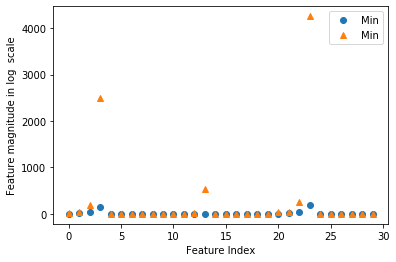

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(X_train.min(axis=0),'o',label = 'Min')
plt.plot(X_train.max(axis=0),'^',label = 'Min')
plt.xlabel('Feature Index')
plt.ylabel('Feature magnitude in log  scale')

plt.legend()

# with scaling the features

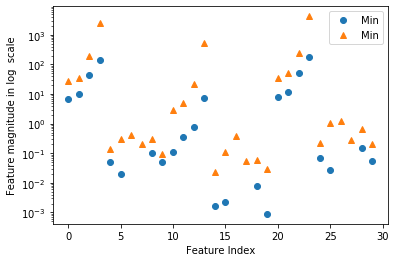

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(X_train.min(axis=0),'o',label = 'Min')
plt.plot(X_train.max(axis=0),'^',label = 'Min')
plt.xlabel('Feature Index')
plt.ylabel('Feature magnitude in log  scale')
plt.yscale('log')
plt.legend()

# So above explanation conclude that is , we need to scaling for more accuracy

In [5]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train) / range_train

print('Minimum feature \n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum feature \n{}'.format(X_train_scaled.max(axis=0)))

Minimum feature 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum feature 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
# scaling for the testing 
X_test_scaled = (X_test - min_train) / range_train

svm = SVC(gamma='auto')
svm.fit(X_train_scaled,y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.948
The accuracy on the test subset: 0.951


# Now the Accuracy score looks(traing score less than the testing set socre) : facing problem with under fitting 
# Further step need to tune some other parameter to overcome the **UnderFitting** problem <font color=green> tuning the C (cost function)</font> 



In [7]:
# scaling for the testing 
X_test_scaled = (X_test - min_train) / range_train

svm = SVC(gamma='auto',C=1000)
svm.fit(X_train_scaled,y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


# Exactly perfact i.e no more under fitting  or overfitting 
# <font color='orange'> less dicrepency between training and testing score </font>

# ****** end of SVM's

# <font color='green'><h1 align ='center' > Uncertainty Estimation </font > </h1>


In [9]:
print('The Decision funtion is \n\n{}:'.format(svm.decision_function(X_test_scaled)[:20]) )

The Decision funtion is 

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]:


In [11]:
print('Thersold decision function is \n\n{}'.format(svm.decision_function(X_train_scaled[:20]  )> 0))

Thersold decision function is 

[ True  True False  True False  True  True  True  True  True  True  True
 False  True False  True False False  True  True]


# In the thersold vaues we notice number of positives benign
# In the thersold values we notice number negative belong to malignant

In [13]:
svm.classes_

array([0, 1])

In [15]:
cancer.target_names


array(['malignant', 'benign'], dtype='<U9')

# The probability tells us how much magnitude will give the either malignent or benign

In [19]:
svm = SVC(C=1000,probability=True,gamma='auto')
svm.fit(X_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [32]:

print('predicted probabilies of sample (malignent and bengin) \n \n{} {}'.format(svm.predict_proba(X_train_scaled[:20]),
                                                                                 svm.predict(X_train_scaled[:20])))

predicted probabilies of sample (malignent and bengin) 
 
[[8.56625443e-03 9.91433746e-01]
 [4.85675976e-06 9.99995143e-01]
 [9.99981588e-01 1.84124283e-05]
 [1.68553445e-02 9.83144656e-01]
 [6.96634284e-01 3.03365716e-01]
 [4.73862464e-03 9.95261375e-01]
 [6.24138125e-03 9.93758619e-01]
 [6.94418737e-03 9.93055813e-01]
 [6.10929987e-02 9.38907001e-01]
 [1.52601295e-01 8.47398705e-01]
 [1.43724250e-01 8.56275750e-01]
 [2.92458825e-06 9.99997075e-01]
 [9.67321500e-01 3.26784997e-02]
 [5.50417225e-02 9.44958278e-01]
 [8.90489114e-01 1.09510886e-01]
 [5.81525443e-06 9.99994185e-01]
 [9.99948338e-01 5.16616938e-05]
 [9.99983103e-01 1.68968842e-05]
 [3.03964766e-03 9.96960352e-01]
 [2.18984310e-02 9.78101569e-01]] [1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1]


In [34]:

# maximum probabilies will give one consider the svm.class (0,1) -- 0(8.56625443e) 1-->(9.91433746e) major probility is  one 

# multclass uncetrainity estimation : on iris dataset

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()
grb = GradientBoostingClassifier(learning_rate=0.1,random_state=0)

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

In [43]:
grb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
print('The decision function for 3-class iris dataset: \n\n {}'.format(grb.decision_function(X_train)[:10]))
print(grb.classes_)

The decision function for 3-class iris dataset: 

 [[-5.89707133  3.70851175 -5.10679529]
 [-5.88619471  3.63208606 -6.52956644]
 [-5.87877299 -6.67949082  4.43467858]
 [ 3.71427807 -6.13807681 -6.41733019]
 [-5.87877299 -6.57963256  4.24098855]
 [ 3.71427807 -6.0065892  -6.41733019]
 [ 3.71427807 -6.0065892  -6.41733019]
 [-5.88652481  2.66159897 -6.76861843]
 [-5.87877299 -6.67949082  4.43467858]
 [-5.87877299 -6.57963582  4.24098855]]
[0 1 2]


In [46]:
# as per the iris dataset we have to adapt the class over decision function values : positive values only consider 
print('Predict probabilite on sample on iris dataset\n\n{}'.format(grb.predict_proba(X_train)[:10])) # each row should always zero 
# sum of probabilies is one 

Predict probabilite on sample on iris dataset

[[6.73371238e-05 9.99784252e-01 1.48411340e-04]
 [7.34876731e-05 9.99887893e-01 3.86190605e-05]
 [3.31821111e-05 1.48989848e-05 9.99951919e-01]
 [9.99907584e-01 5.26182625e-05 3.97977302e-05]
 [4.02733015e-05 1.99819463e-05 9.99939745e-01]
 [9.99900191e-01 6.00119358e-05 3.97974359e-05]
 [9.99900191e-01 6.00119358e-05 3.97974359e-05]
 [1.93855423e-04 9.99725905e-01 8.02397499e-05]
 [3.31821111e-05 1.48989848e-05 9.99951919e-01]
 [4.02733016e-05 1.99818813e-05 9.99939745e-01]]


# Preprocessing 
+ Binarization 
+ scaling 
+ Normalizaion 
+ mean removal

# Binarization 
+ it will convert the all data points in between to 0 and 1 based on the what thersold values provide 
+ below thersold value it consider as zero(0)
+ above the thersold values binarizer consider as a one(1) 

In [47]:
from sklearn.preprocessing import Binarizer
import numpy as np

data = np.array([[2.5,5.9,-1.8],[5.5,3.9,-5.1],[-1.9,4.2,3.1]])

In [50]:
binary_data = Binarizer(threshold=2).fit_transform(data) # based on thersold values it deivide the eithe comes under zero or one

In [51]:
binary_data

array([[1., 1., 0.],
       [1., 1., 0.],
       [0., 1., 1.]])

# 2.mean remove : also called as standardizaton

In [53]:
print('Mean before =',data.mean(axis=0))
print('Standard deivation (before)',data.std(axis=0))

Mean before = [ 2.03333333  4.66666667 -1.26666667]
Standard deivation (before) [3.03900569 0.88065632 3.3688112 ]


# Data not centred ,for centering we have to scaling 

In [57]:
from sklearn.preprocessing import scale
scaled_data = scale(data)

print('mean after scaling',scaled_data.mean(axis=0))
print('standared deviation after scaling',scaled_data.std(axis=0))
# now data is centered and variance is same mangitute

mean after scaling [ 7.40148683e-17 -1.48029737e-16 -7.40148683e-17]
standared deviation after scaling [1. 1. 1.]



## 3. Scaling

- StandardScaler - => features with a mean=0 and variance=1
- MinMaxScaler - => features in a 0 to 1 range
- Normalizer - => feature vector to a Euclidean length=1

In [60]:
# It convert the values between o and 1 based on what data we have

from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_minmax = minmax_scaler.fit_transform(data)
print('Before min_Max scaler \n',data)
print('MinMaxScaler applied on the data:\n', data_minmax)

Before min_Max scaler 
 [[ 2.5  5.9 -1.8]
 [ 5.5  3.9 -5.1]
 [-1.9  4.2  3.1]]
MinMaxScaler applied on the data:
 [[0.59459459 1.         0.40243902]
 [1.         0.         0.        ]
 [0.         0.15       1.        ]]


### 4. Normalization

-- bringing the values of each feature vector on a common scale

- L1 - Least Absolute Deviations - sum of absolute values (on each row) = 1; it is insensitive to outliers
- L2 - Least Squares - sum of squares (on each row) = 1; takes outliers in consideration during training

In [61]:
data

array([[ 2.5,  5.9, -1.8],
       [ 5.5,  3.9, -5.1],
       [-1.9,  4.2,  3.1]])

In [62]:
data_l1 = preprocessing.normalize(data, norm='l1')
data_l2 = preprocessing.normalize(data, norm='l2')

print('L1-normalized data:\n', data_l1)
print('\nL2-normalized data:\n', data_l2)

L1-normalized data:
 [[ 0.24509804  0.57843137 -0.17647059]
 [ 0.37931034  0.26896552 -0.35172414]
 [-0.20652174  0.45652174  0.33695652]]

L2-normalized data:
 [[ 0.37561086  0.88644164 -0.27043982]
 [ 0.65058014  0.46132046 -0.60326522]
 [-0.34202326  0.75605141  0.55803795]]


In [64]:
0.39416058+0.23357664+0.37226277 # sum of absolute values is equal to 1

0.9999999900000001

In [65]:
0.3359268**2+0.90089461**2+(-0.2748492)**2 # sum of squares is equal to 1

0.9999999960259321

## <center> Label Encoding</center>

- setosa -> 0
- versicolor -> 1
- virginica -> 2

In [66]:
from sklearn import preprocessing

labels = ['setosa', 'versicolor', 'virginica']

In [67]:
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)

for i, item in enumerate(encoder.classes_):
    print(item, '=>', i)

setosa => 0
versicolor => 1
virginica => 2


In [68]:
more_labels = ['versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor']
more_labels_encoded = encoder.transform(more_labels)

print('More labels =', more_labels)
print('More labels encoded =', list(more_labels_encoded))

More labels = ['versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor']
More labels encoded = [1, 1, 2, 0, 1]


 ## <center> One-Hot Encoding</center>

- used on categorical variables
- it replaces a categorical variable/feature with one or more new features that will take the values of 0 or 1
- increases data burden
- increases the efficiency of the process

In [16]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('c:/Users/Hari/Desktop/datasets/adult.csv', header=None, index_col=False, names=['age', 'workclass', 'fnlwgt', 'education', 
                                                                      'education-num', 'marital-status', 'occupation', 
                                                                      'relationship', 'race', 'gender', 'capital-gain', 
                                                                      'capital-loss', 'hours-per-week', 'native-country', 
                                                                      'income'])
data.shape

(32562, 15)

In [17]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data)

,age,workclass,education,gender,hours-per-week,occupation,income
0,age,workclass,education,sex,hours-per-week,occupation,NaN
1,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
2,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
3,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
4,53,Private,11th,Male,40,Handlers-cleaners,<=50K
...,...,...,...,...,...,...,...
32557,27,Private,Assoc-acdm,Female,38,Tech-support,<=50K
32558,40,Private,HS-grad,Male,40,Machine-op-inspct,>50K
32559,58,Private,HS-grad,Female,40,Adm-clerical,<=50K
32560,22,Private,HS-grad,Male,20,Adm-clerical,<=50K


In [18]:
print('Original Features:\n', list(data.columns), '\n')
# Below line will convert categorical and numerical columns also converting to onehot encoding, it's not recommending 
data_dummies = pd.get_dummies(data)
print('Features after One-Hot Encoding:\n', list(data_dummies.columns))  # don't run the 


Original Features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after One-Hot Encoding:
 ['age_     age', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22', 'age_23', 'age_24', 'age_25', 'age_26', 'age_27', 'age_28', 'age_29', 'age_30', 'age_31', 'age_32', 'age_33', 'age_34', 'age_35', 'age_36', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43', 'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50', 'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64', 'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_77', 'age_78', 'age_79', 'age_80', 'age_81', 'age_82', 'age_83', 'age_84', 'age_85', 'age_86', 'age_87', 'age_88', 'age_90', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Privat

In [20]:
# data_dummies['occupation_ Transport-moving']

0        0
1        0
2        0
3        0
4        0
        ..
32557    0
32558    0
32559    0
32560    0
32561    0
Name: occupation_ Transport-moving, Length: 32562, dtype: uint8

In [27]:
# we have to convert only categorical columns need to onehotencoding 
# The problem is after
features = data_dummies.ix[:, 'age_     age':'occupation_ Transport-moving']
# features = pd.get_dummies(data,columns=['age','occupation_Transport-moving'],drop_first=True,)
X = features.values
y = data_dummies['income_ >50K'].values

E:\installation_files\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)

print('Logistic Regression score on the test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Logistic Regression score on the test set: 0.82


# <center> Automatic Feature Selection </center>

- <b><span style='color:green'>to reduce dimensionality<span></b>
- common methods: 
    + univariate statistics, 
    + model-based selection, 
    + iterative selection

### 1. Univariate Statistics

- determines the relationship between each feature and output (target)
- only the features with highest confidence are selected
- <b><span style='color:blue'>SelectKBest</span></b> - selecting K number of features
- <b><span style='color:blue'>SelectPercentile</span></b> - selection is made based on a percentage of the original features

In [49]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

# noise added for producing the higher dimensionality

In [36]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
noise.shape

(569, 50)

# Marge the dimensionality and noise together

In [170]:
X_w_noise = np.hstack([noise,cancer.data]) # Harizantally stacking the noise and original dataset together 
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.2)

In [171]:
X_w_noise.shape

(569, 80)

In [172]:
select = SelectPercentile(percentile=50) # object is created with SelectPercentile: method
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape)) # Befor noise shape of X_train
print('X_train_selected.shape is: {}'.format(X_train_selected.shape)) # after adding noise to X-train

X_train.shape is: (455, 80)
X_train_selected.shape is: (455, 40)


# Evaluate the model with percentile feature selection and all features selection together 

In [180]:
X_test_s = select.transform(X_test)
# score = LogisticRegression(solver='lbfgs',max_iter=1E6).fit(X_train_s, y_train).score(X_test_s, y_test)
score = LogisticRegression().fit(X_train_s, y_train).score(X_test_s, y_test)
print('The score of Logistic Regression with the selected features on the test set: {:.3f}'.format(score))

The score of Logistic Regression with the selected features on the test set: 0.412


E:\installation_files\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True False  True False  True False False False  True False False
 False  True False False False False False False False  True False False
 False False False False False False  True False False False False False
  True  True False False False  True  True  True False  True False False
 False False  True  True  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]


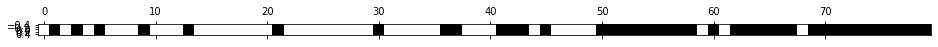

In [55]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r') # here black will represent the feature is used,and white will represent not feature not used


# calculating the accuracy for before feature selection and after feature selection 

In [62]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression(solver='lbfgs',max_iter=20000)
logreg.fit(X_train, y_train)
print('The score of Logistic Regression on all features: {:.3f}'.format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.3f}'.format(logreg.score(X_test_selected, y_test)))

The score of Logistic Regression on all features: 0.930
The score of Logistic Regression on the selected features: 0.930


### 2. Model-Based Feature Selection

- uses a supervised model to determine the importance of each feature
- keeps the most important features
- needs a measure for the importance of features (DT and RF have the 'feature_importances' attribute)

In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [74]:
select.fit(X_train,y_train)
X_train_s = select.transform(X_train)

print('The shape of before feature selection: ',X_train.shape)
print('Shape after feature selection: ',X_train_s.shape)
# select.get_support(X_train)

The shape of before feature selection:  (455, 80)
Shape after feature selection:  (455, 40)


# nearly 50% i.e half the columns removed beacuse those columns not usefull for our model building 

In [148]:
df = pd.read_csv('c:/Users/Hari/desktop/datasets/Naresh_datasets/diabetes2.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Implementing the feature selection over diabtic dataset,
Unfortunaly need to spend some time to figure out issue is [After feature selection need score should be increase in this case it decreasing ]

In [161]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
dgr = GradientBoostingClassifier()
feature_selection = SelectFromModel(GradientBoostingClassifier(n_estimators=150,random_state=42),threshold='mean')
X = df.iloc[:,0:8].values

y = df.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
y_train_s = y_train
# dgr.fit(X_train,y_train).score(X_train,y_train)

In [162]:
feature_selection.fit(X_train,y_train_s)
feature_af = feature_selection.transform(X_train)

print('Number of Features before selecion',X_train.shape)
print('Number of features after selection ',feature_af.shape)

Number of Features before selecion (537, 8)
Number of features after selection  (537, 3)


In [163]:
# dgr.fit(y_train,y_train)
dgr.fit(feature_af,y_train_s)
# print('Score with all features :{}'.format(dgr.score(X_train,y_train)))

print('Score with important features only :{}'.format(dgr.score(feature_af,y_train_s)))
      


Score with important features only :0.8975791433891993


In [164]:
dgr.score(feature_af,y_train)


0.8975791433891993

In [165]:
dt = DecisionTreeClassifier()
# dt.fit(X_train,y_train).score(X_train,y_train)

In [166]:
# dt.fit(X_train_s,y_train).score(X_train_s,y_train)

[False  True False False False  True False  True]


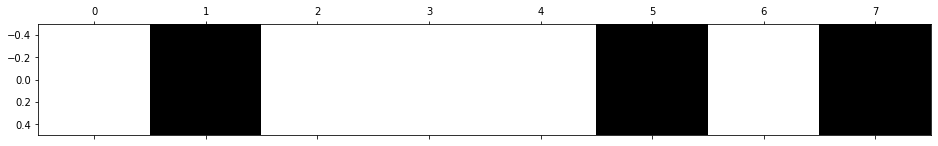

In [167]:
mask = feature_selection.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r') # here black will represent the feature is used,and white will represent not feature not used
